In [67]:
import pydicom
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import matplotlib.image as mpimg
import os
import natsort
import dicom_functions
import explore_dicom_data

In [2]:
# Open the image files. 

#dataDir = r'C:\DICOM_data\Select NCITA coding task images'
rootDir = r'C:\DICOM_data\Softneta data\2015-04-30 Neuro'

#img1_name = 'slice_12_rot15deg_flipLR_flipUD.tif'
#img2_name = 'slice_12.tif'

#img1_colour = cv2.imread(os.path.join(rootDir, img1_name))  # Image to be aligned. 
#img2_colour = cv2.imread(os.path.join(rootDir, img2_name))  # Reference image. 

data = explore_dicom_data.load_dicom(dataDir)

np.shape(data)

NameError: name 'dataDir' is not defined

In [34]:


# Create a dictionary to store the dicom file names with unique keys for each unique base directory:
dicomDict = {}

for root, dirs, files in os.walk(rootDir):
    
    
    #print('root:\n\n', root, '\n')
    #print('dirs:\n\n', dirs, '\n')
    #print('files:\n\n', files, '\n')
    
    ## If in base directory containing files, i.e.
    #if len(files)>0:
    #    dir_basename = os.path.basename(root) # get the dir basename
    #    
    #    dicomDict.update({dir_basename:{'fpaths':fpaths}})
        

    Nfiles = len(files) # number of files in this directory
    
    # If this directory contains files, i.e.
    if Nfiles>0:
        # Create for each directory walk-through:
        fpaths = [] # (full) file paths
        fdirs = [] # file directories (base directories) for each path in fpaths
        fnames = [] # file names for each path in fpaths
        frames = [] # dicom image fraes for each dicom file
    
        for file in files:

            fpath = os.path.join(root, file)

            filepath_no_ext, file_ext = os.path.splitext(fpath)

            if 'dcm' in file_ext:
                fpaths.append(fpath) # append file path to fpaths

                dir_basename = os.path.basename(root) # get the dir basename
                fdirs.append(dir_basename) # append the directory name to fdirs

                fname = os.path.split(fpath)[1] # get the file name only
                fnames.append(fname) # append file name to fnames
                
                frames.append(pydicom.read_file(fpath)) 

        dicomDict.update({dir_basename:{'fpaths':fpaths, 'fnames':fnames, 'frames':frames
                                       }})


dictKeys = list(dicomDict.keys()) # get list of dictionary keys
        
dicomDict[dictKeys[0]] # display the entries of the first key in the dictionary

{'fpaths': ['C:\\DICOM_data\\Softneta data\\2015-04-30 Neuro\\series-000000\\image-000000.dcm',
  'C:\\DICOM_data\\Softneta data\\2015-04-30 Neuro\\series-000000\\image-000001.dcm'],
 'fnames': ['image-000000.dcm', 'image-000001.dcm'],
 'frames': [(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
  (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'LOCALIZER']
  (0008, 0012) Instance Creation Date              DA: '20150430'
  (0008, 0013) Instance Creation Time              TM: '092813'
  (0008, 0016) SOP Class UID                       UI: CT Image Storage
  (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.1055.1.20170626100129224.116263729.2179470
  (0008, 0020) Study Date                          DA: '20150430'
  (0008, 0021) Series Date                         DA: '20150430'
  (0008, 0022) Acquisition Date                    DA: '20150430'
  (0008, 0023) Content Date                        DA: '20150430'
  (0008,

In [62]:
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'4', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'6'}

pyplot.figure(figsize=(1, 1), dpi=300)

s = 1 # series (directory) number

# Copy the frames for this series:
frames = dicomDict[dictKeys[s]]['frames']

print('There are {} frames in series "{}"'.format(len(frames), dictKeys[s]))
print('The modality is {}'.format(frames[0].Modality))

f = 1 # frame number within series

frame = dicomDict[dictKeys[s]]['frames'][f]
    
pyplot.figure(dpi=300);
pyplot.axes().set_aspect('equal', 'datalim');
pyplot.set_cmap(pyplot.gray());
#pyplot.pcolormesh(someData.pixel_array);
pyplot.pcolormesh(np.fliplr(np.flipud(frame.pixel_array)));

There are 47 frames in series "series-000001"
The modality is CT


<Figure size 300x300 with 0 Axes>

There are 47 frames in PT series "series-000003"


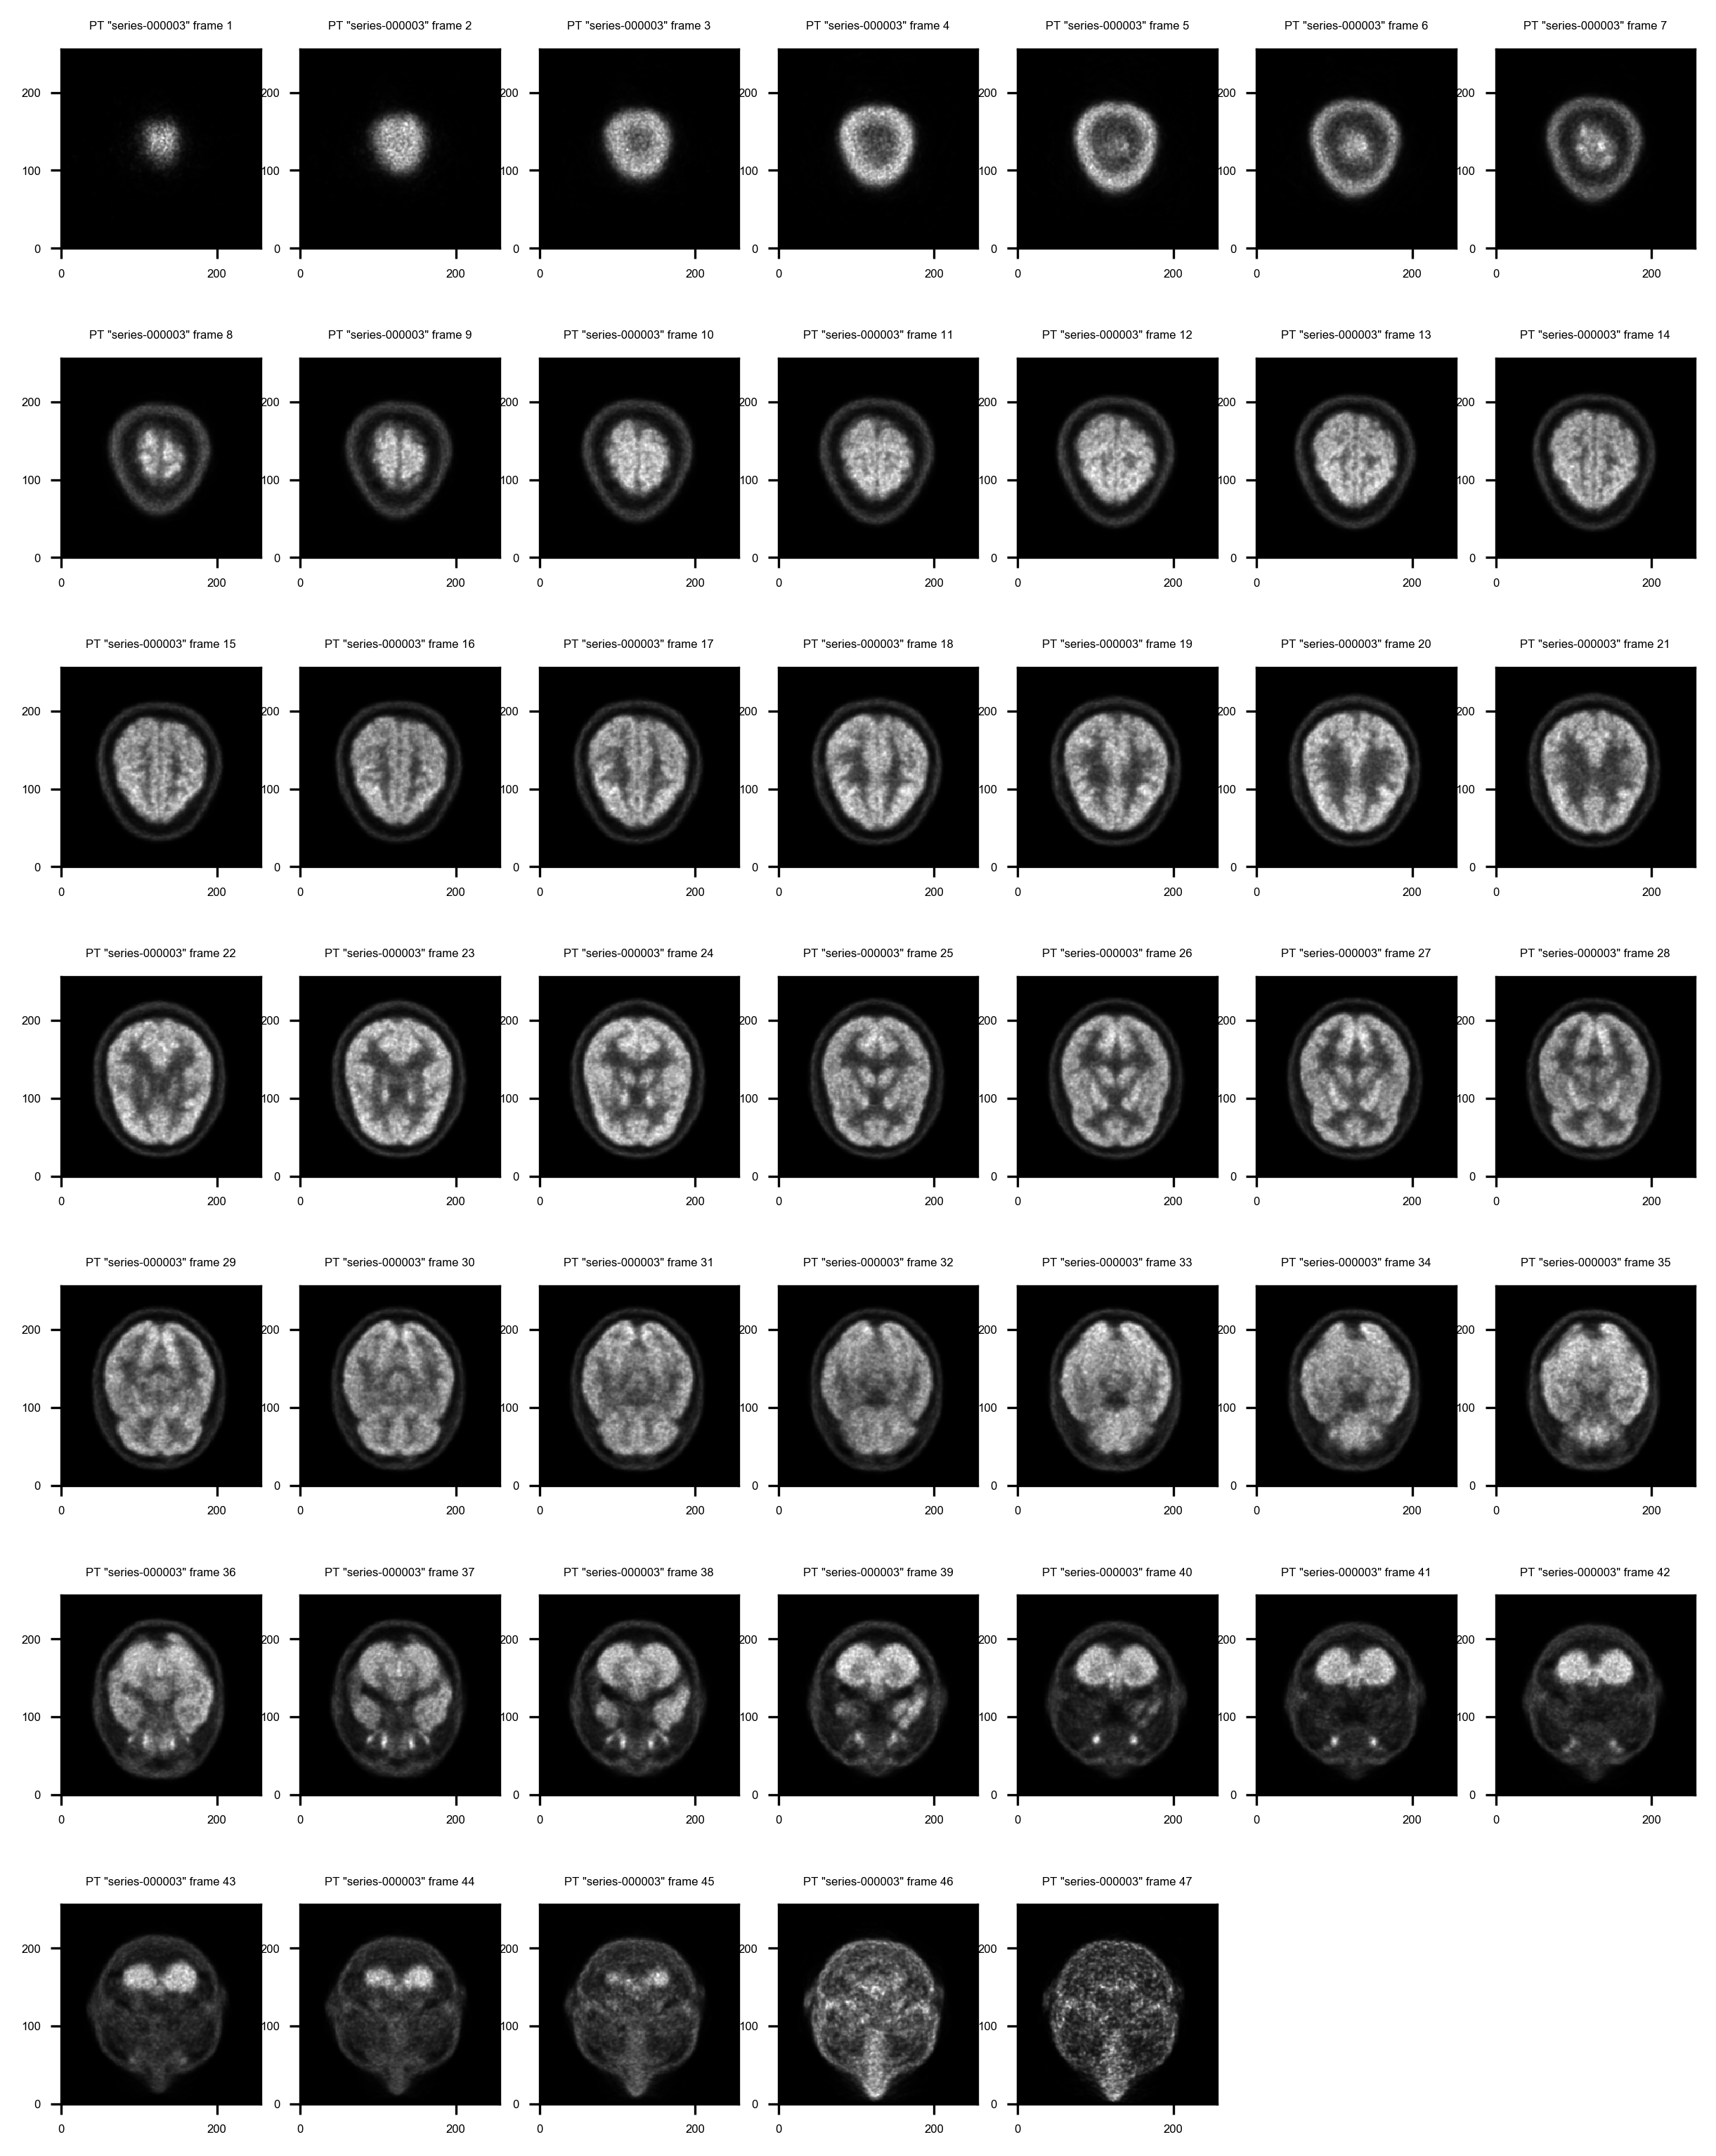

In [90]:
s = 3 # series (directory) number

# Copy the frames for this series:
frames = dicomDict[dictKeys[s]]['frames']

#dimZ = frames.shape[2]
dimZ = len(frames)

seriesName = dictKeys[s]
seriesModality = frames[0].Modality

print('There are {} frames in {} series "{}"'.format(dimZ, seriesModality, seriesName))

# Configure plot:
# Set the font dictionaries (for plot title and axis titles):
title_font = {'fontname':'Arial', 'size':'4', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'6'}
# Set the number of subplot columns:
#cols = 5
#cols = 4
#cols = 3
#cols = 7
cols = np.int8(np.round(np.sqrt(dimZ)))

#pyplot.figure(figsize=(5, 50), dpi=300);
#pyplot.figure(figsize=(5, 70), dpi=300);
#pyplot.figure(figsize=(5, 90), dpi=300);
#pyplot.figure(figsize=(7, 50), dpi=300);
#pyplot.figure(figsize=(10, 70), dpi=300);
#pyplot.figure(figsize=(10, 10*cols), dpi=300);
#pyplot.figure(figsize=(2*cols, 10*cols), dpi=300);
pyplot.figure(figsize=(10, 13*cols), dpi=300);

i = 0 # for subplot pos

for f in range(dimZ):
    #print('Working on frame', str(f+1), 'of', str(dimZ), '...')
    
    # This frame:
    frame = frames[f].pixel_array
        
    # Plot:
    i = i + 1    
    ax = pyplot.subplot(dimZ,cols,i, aspect='equal')
    #pyplot.pcolormesh(x, y, frame);
    pyplot.pcolormesh(frame);
    #pyplot.title('frame ' + str(f+1), **title_font)
    pyplot.title('{} "{}" frame {}'.format(seriesModality, seriesName, f+1), **title_font)

    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(4)
        
#plt.savefig('{} {} - all frames.jpg'.format(seriesModality, seriesName), bbox_inches='tight')

In [80]:
np.int8(np.round(np.sqrt(47)))

7

# Convert to grayscale. 
img1 = cv2.cvtColor(img1_colour, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_colour, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape 

print(np.max(img1), np.max(img2))

#cv2.imshow('Reference image (img2)', img2)
#cv2.waitKey(0) # waits until a key is pressed
#cv2.destroyAllWindows() # destroys the window showing image

plt.title('Reference image (img2)')
plt.imshow(img2, cmap='gray')

# This just hides x and y tick values by passing in 
# empty lists to make the output a little cleaner 
plt.xticks([]), plt.yticks([]) 
plt.show()

In [91]:
# Create ORB detector with 5000 features. 
orb_detector = cv2.ORB_create(5000) 

In [101]:
# See what happens if the images are the same:
f1 = 25
f2 = 25
img1 = frames[f1].pixel_array
img2 = frames[f2].pixel_array

# Convert to OpenCV image:
img1 = cv2.resize(img1, img1.shape)
img2 = cv2.resize(img2, img2.shape)

#img1 = np.double(img1)
#img1 = np.int8(img1)

# cv2.resize(img_np,(200,200))

# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
#  (which is not reqiured in this case). 
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 
  
# Match features between the two images. 
# We create a Brute Force matcher with  
# Hamming distance as measurement mode. 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
  
# Match the two sets of descriptors. 
matches = matcher.match(d1, d2) 
  
# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 
  
# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*90)] 
no_of_matches = len(matches) 
  
# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 
  
for i in range(len(matches)): 
    p1[i, :] = kp1[matches[i].queryIdx].pt 
    p2[i, :] = kp2[matches[i].trainIdx].pt 

# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
  
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
                    homography, (width, height)) 
  
# Save the output. 
#cv2.imwrite('output.jpg', transformed_img) 

# Set the number of subplot columns:
cols = 3

pyplot.figure(figsize=(5, 5), dpi=300);
      
# Plot img1:   
ax = pyplot.subplot(1,cols,1, aspect='equal')
#pyplot.pcolormesh(x, y, frame);
pyplot.pcolormesh(img1);
#pyplot.title('frame ' + str(f+1), **title_font)
pyplot.title('{} "{}" frame {}'.format(seriesModality, seriesName, f1), **title_font)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Plot img2:   
ax = pyplot.subplot(1,cols,2, aspect='equal')
#pyplot.pcolormesh(x, y, frame);
pyplot.pcolormesh(img2);
#pyplot.title('frame ' + str(f+1), **title_font)
pyplot.title('{} "{}" frame {}'.format(seriesModality, seriesName, f2), **title_font)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
        
# Plot the transformed image:   
ax = pyplot.subplot(1,cols,3, aspect='equal')
#pyplot.pcolormesh(x, y, frame);
pyplot.pcolormesh(transformed_img);
#pyplot.title('frame ' + str(f+1), **title_font)
pyplot.title('{} "{}" transformed image'.format(seriesModality, seriesName), **title_font)

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
#plt.savefig('{} {} - all frames.jpg'.format(seriesModality, seriesName), bbox_inches='tight')

error: OpenCV(4.1.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [105]:
img1.shape

(256, 256)

In [107]:
img1 = cv2.resize(img1, img1.shape)
img1.channels()

AttributeError: 'numpy.ndarray' object has no attribute 'channels'

In [104]:
# Try BGR2GRAY:

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 

error: OpenCV(4.1.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [103]:
img1.dtype

dtype('int16')

In [99]:
img1.dtype

dtype('int8')

In [108]:
dicomDict[dictKeys[s]]['frames'][0].dtype

AttributeError: 'FileDataset' object has no attribute 'dtype'

In [111]:
dicomDict[dictKeys[s]]['frames'][0].pixel_array.dtype

dtype('int16')

In [115]:
cv2.imshow('sample image dicom', dicomDict[dictKeys[s]]['frames'][f1].pixel_array)

cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

# 18/12/19

img1_mpl:

shape =  (384, 384)
dtype =  uint16
values range =  0  to  1035

img1_cv2:

shape =  (384, 384)
dtype =  uint8
values range =  0  to  4

img1_cv2_colour_gray:

shape =  (384, 384)
dtype =  uint8
values range =  0  to  4

img1_mpl_cv2:

shape =  (384, 384)
dtype =  uint16
values range =  0  to  1035


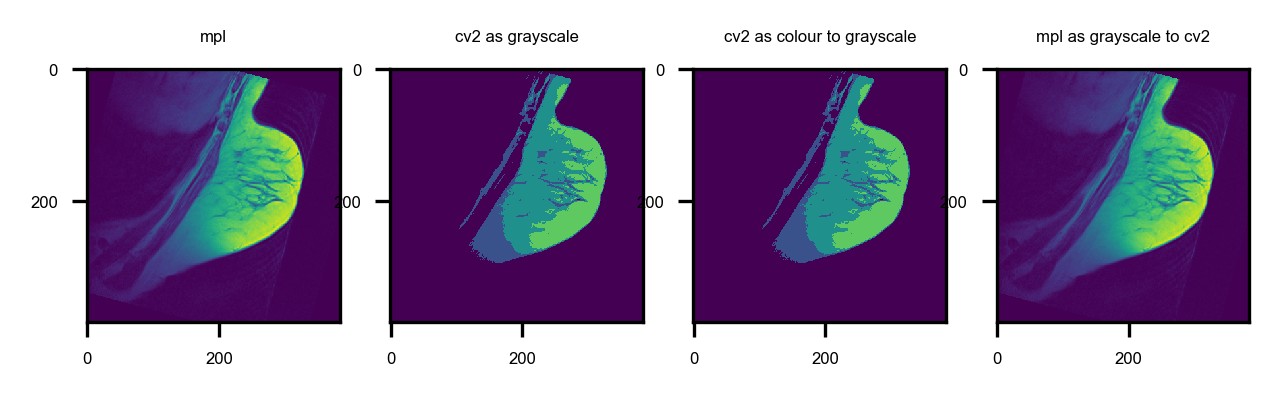

In [52]:
# Open the image files. 

#dataDir = r'C:\DICOM_data\Select NCITA coding task images'
rootDir = r'C:\Users\ctorti\Documents\GitHub\WP1.3_multiple_modalities\trying stuff'

img1_name = 'slice_12_rot15deg_flipLR_flipUD.tif'
img2_name = 'slice_12.tif'

# Read in the images:
img1_colour = cv2.imread(os.path.join(rootDir, img1_name))  # Image to be aligned; read as colour image
img2_colour = cv2.imread(os.path.join(rootDir, img2_name))  # Reference image. 

#img1_cv2 = cv2.imread(os.path.join(rootDir, img1_name))  # Image to be aligned; read as colour image 
#img1_cv2 = cv2.imread(os.path.join(rootDir, img1_name), 0)  # Image to be aligned; read as grayscale image
img1_cv2 = cv2.imread(os.path.join(rootDir, img1_name), cv2.IMREAD_GRAYSCALE)  # Image to be aligned; read as grayscale image
img1_mpl = mpimg.imread(os.path.join(rootDir, img1_name))  # Image to be aligned. 

img1_cv2_colour = cv2.imread(os.path.join(rootDir, img1_name))  # Image to be aligned; read as colour image
img1_cv2_colour_gray = cv2.cvtColor(img1_colour, cv2.COLOR_BGR2GRAY) # convert to grayscale

#img1_cv2_u16 = np.uint16(img1_cv2) # convert to uint16

# Use cv2.resize() to "convert" from matplotlib to cv2 object:
img1_mpl_cv2 = cv2.resize(img1_mpl, img1_mpl.shape)

#plt.imshow(img1_cv2)
#plt.imshow(img1_mpl)

# Set the font dictionaries (for plot title and axis titles):
title_font = {'fontname':'Arial', 'size':'4', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'6'}

# Set the number of subplot columns:
cols = 4

plt.figure(figsize=(5, 15), dpi=300);
i = 0             
# Col 1:  
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(img1_mpl);
plt.title('mpl', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Col 2:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(img1_cv2);
plt.title('cv2 as grayscale', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Col 3:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(img1_cv2_colour_gray);
plt.title('cv2 as colour to grayscale', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Col 4:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(img1_mpl_cv2);
plt.title('mpl as grayscale to cv2', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
    
print('img1_mpl:')
print('\nshape = ', img1_mpl.shape)
print('dtype = ', img1_mpl.dtype)
print('values range = ', np.min(img1_mpl), ' to ', np.max(img1_mpl))

print('\nimg1_cv2:')
print('\nshape = ', img1_cv2.shape)
print('dtype = ', img1_cv2.dtype)
print('values range = ', np.min(img1_cv2), ' to ', np.max(img1_cv2))

print('\nimg1_cv2_colour_gray:')
print('\nshape = ', img1_cv2_colour_gray.shape)
print('dtype = ', img1_cv2_colour_gray.dtype)
print('values range = ', np.min(img1_cv2_colour_gray), ' to ', np.max(img1_cv2_colour_gray))

print('\nimg1_mpl_cv2:')
print('\nshape = ', img1_mpl_cv2.shape)
print('dtype = ', img1_mpl_cv2.dtype)
print('values range = ', np.min(img1_mpl_cv2), ' to ', np.max(img1_mpl_cv2))



In [44]:
img1_mpl[150]

array([  0,   0,   0,   0,   1,  10,  12,  11,  10,   7,  10,  13,  11,
        10,   8,   6,   3,   9,  16,  18,  18,  12,  20,  31,  15,  13,
        15,  13,  16,  14,  11,  14,  15,  14,  13,   8,  12,  12,   9,
        14,  15,  10,   8,  12,  10,  11,  17,  17,  13,  28,  24,   7,
         5,  15,  14,  20,  13,   6,  20,  12,  13,  10,  12,  13,  14,
        11,   9,  18,  14,   7,  12,  14,  13,  19,  19,  14,  10,  15,
        23,  17,  24,  18,  15,  36,  21,  31,  31,  19,  18,  26,  25,
        18,  14,  27,  20,  13,  11,  15,  17,  11,  14,  15,  12,  23,
        20,  23,  13,  17,  24,  16,  12,  13,  30,  24,  34,  26,  27,
        23,  17,  13,  17,  22,  21,  10,  14,  18,  19,  28,  33,  31,
        29,  41,  43,  43,  30,  27,  41,  24,  32,  38,  29,  15,  37,
        28,  40,  59,  52,  72,  87,  78,  89, 105,  84,  85,  82,  74,
        85,  95, 106, 133, 157, 188, 245, 260, 297, 349, 347, 357, 403,
       452, 448, 317, 152,  96, 117, 153, 203, 214, 192, 213, 19

In [45]:
img1_cv2[150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,

# Because OpenCV is loading the images in uint8 with severe loss of grayscale values, and I can't figure out how to get it to read it in uint16, use matplotlib to load the images instead:

In [62]:
# Open the image files. 

#dataDir = r'C:\DICOM_data\Select NCITA coding task images'
rootDir = r'C:\Users\ctorti\Documents\GitHub\WP1.3_multiple_modalities\trying stuff'

img1_name = 'slice_12_rot15deg_flipLR_flipUD.tif' # Image to be aligned
img2_name = 'slice_12.tif' # Reference image

# Read in the images:
img1 = mpimg.imread(os.path.join(rootDir, img1_name))  # Image to be aligned
img2 = mpimg.imread(os.path.join(rootDir, img2_name))  # Ref image

# Convert to OpenCV objects:
img1 = cv2.resize(img1, img1.shape) 
img2 = cv2.resize(img2, img2.shape) 



# Set the font dictionaries (for plot title and axis titles):
title_font = {'fontname':'Arial', 'size':'4', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'6'}

# Set the number of subplot columns:
cols = 3

plt.figure(figsize=(5, 15), dpi=300);
i = 0             
# Col 1:  
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(img1);
plt.title('img1', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Col 2:   
i += 1
ax = plt.subplot(1,cols,i, aspect='equal');
plt.imshow(img2);
plt.title('img2', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
       
print('img1:')
print('\nshape = ', img1.shape)
print('dtype = ', img1.dtype)
print('values range = ', np.min(img1), ' to ', np.max(img1))

print('\nimg2:')
print('\nshape = ', img2.shape)
print('dtype = ', img2.dtype)
print('values range = ', np.min(img2), ' to ', np.max(img2))

img1:

shape =  (384, 384)
dtype =  uint16
values range =  0  to  1035

img2:

shape =  (384, 384)
dtype =  uint16
values range =  0  to  1042


In [67]:
# Create ORB detector with 5000 features. 
orb = cv2.ORB_create(5000) 

# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
#  (which is not reqiured in this case). 
keyPoints1, descriptors1 = orb.detectAndCompute(img1, None) 
keyPoints2, descriptors2 = orb.detectAndCompute(img2, None) 

error: OpenCV(4.1.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [64]:
cv2.ocl.setUseOpenCL(False)

# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
#  (which is not reqiured in this case). 
keyPoints1, descriptors1 = orb.detectAndCompute(img1, None) 
keyPoints2, descriptors2 = orb.detectAndCompute(img2, None) 

error: OpenCV(4.1.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


# Maybe the images need to have 3 channels (i.e. be in colour rather than grayscale)?

In [60]:
# Load images in colour:
img1 = cv2.imread(os.path.join(rootDir, img1_name))
img2 = cv2.imread(os.path.join(rootDir, img2_name))

print(img1.shape)

keyPoints1, descriptors1 = orb.detectAndCompute(img1, None) 
keyPoints2, descriptors2 = orb.detectAndCompute(img2, None) 

print('keyPoints1 = ', keyPoints1)
print('descriptors1 = ', descriptors1)
print('keyPoints2 = ', keyPoints2)
print('descriptors2 = ', descriptors2)

(384, 384, 3)
keyPoints1 =  []
descriptors1 =  None
keyPoints2 =  []
descriptors2 =  None


# So with 3 channels I don't get an error when searching for features but I don't get any!

# Following code here: https://www.geeksforgeeks.org/image-registration-using-opencv-python/

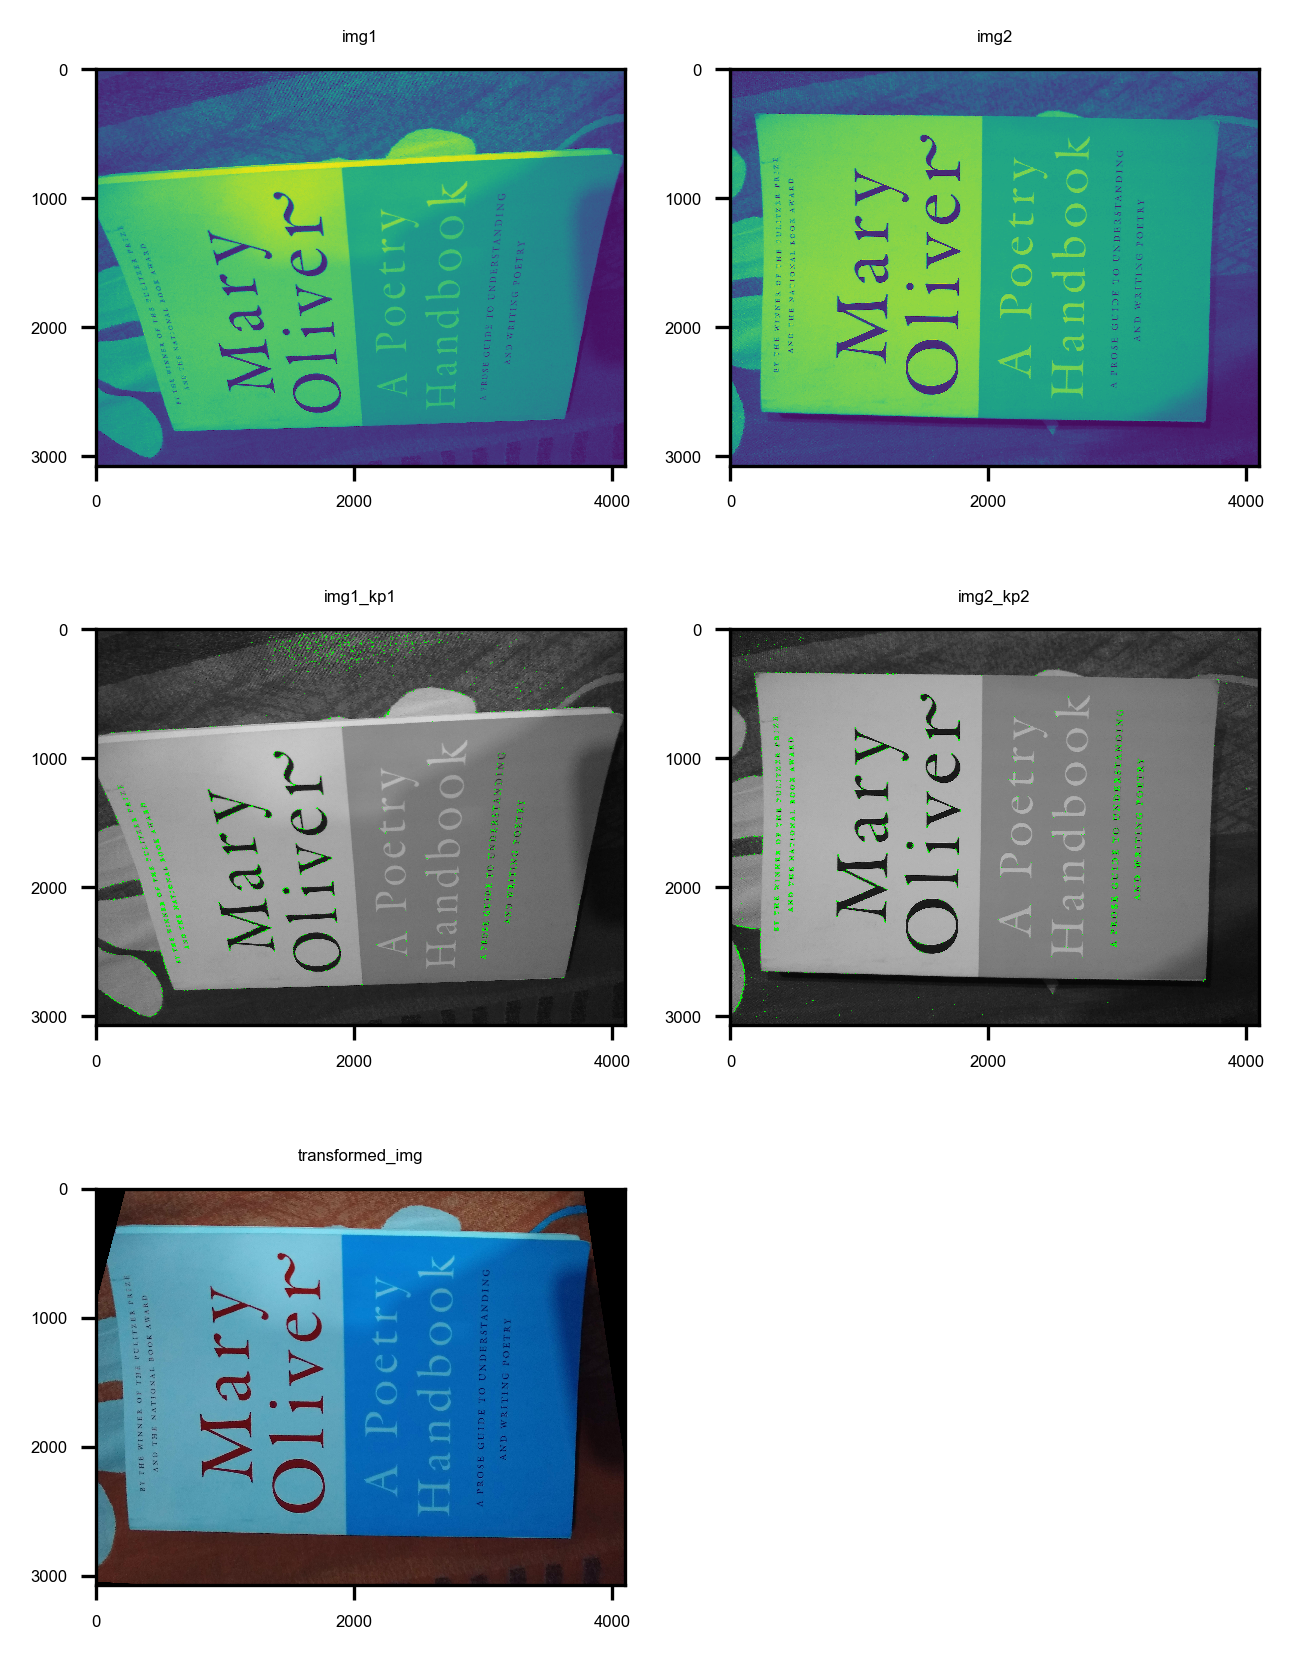

In [82]:
# Open the image files. 
img1_color = cv2.imread("im2.jpg")  # Image to be aligned. 
img2_color = cv2.imread("im1.jpg")    # Reference image. 
  
# Convert to grayscale. 
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape 
  
# Create ORB detector with 5000 features. 
orb_detector = cv2.ORB_create(5000) 
#orb_detector = cv2.ORB_create() 
orb_detector = cv2.ORB_create(10000) 
  
# Find keypoints and descriptors. 
# The first arg is the image, second arg is the mask 
#  (which is not reqiured in this case). 
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 

if 0:
    print('kp1 = ', kp1)
    print('d1 = ', d1)
    print('kp2 = ', kp2)
    print('d2 = ', d2)

# Draw keypoints' locations (not size or orientation):
img1_kp1 = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=0)
img2_kp2 = cv2.drawKeypoints(img2, kp2, None, color=(0,255,0), flags=0)
    
# Match features between the two images. 
# We create a Brute Force matcher with  
# Hamming distance as measurement mode. 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
  
# Match the two sets of descriptors. 
matches = matcher.match(d1, d2) 
  
# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 
  
# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*90)] 
no_of_matches = len(matches) 
  
# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 
  
for i in range(len(matches)): 
    p1[i, :] = kp1[matches[i].queryIdx].pt 
    p2[i, :] = kp2[matches[i].trainIdx].pt 

# Find the homography matrix. 
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
  
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
                    homography, (width, height))


# Set the number of subplot rows and columns:
rows = 3
cols = 2

plt.figure(figsize=(5, 7), dpi=300);
i = 0             
# Row 1, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(img1);
plt.title('img1', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 1, Col 2:   
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(img2);
plt.title('img2', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
       
# Row 2, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(img1_kp1);
plt.title('img1_kp1', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 2, Col 2:   
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(img2_kp2);
plt.title('img2_kp2', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)       
    
# Row 3, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(transformed_img);
plt.title('transformed_img', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)

# That worked.  So it's not a problem with ORB not working in OpenCV 4.  

# So what's different about the images of the book covers and the images read from DICOM files?

# The .tifs saved in ImageJ are 16-bit whereas the ones that were opened then saved in IrfanView are 8-bit!

In [88]:
# Open the image files. 
book_colour = cv2.imread('im2.jpg')  # book cover (24-bit)
breast_colour = cv2.imread('slice_12_orig_16bit.tif') # breast (16-bit)
  
# Convert to grayscale. 
book_gray = cv2.cvtColor(book_colour, cv2.COLOR_BGR2GRAY)
breast_gray = cv2.cvtColor(breast_colour, cv2.COLOR_BGR2GRAY)

print('book_color:')
print('\nshape = ', book_colour.shape)
print('dtype = ', book_colour.dtype)
print('values range = ', np.min(book_color), ' to ', np.max(book_color))

print('\nbook_gray:')
print('\nshape = ', book_gray.shape)
print('dtype = ', book_gray.dtype)
print('values range = ', np.min(book_gray), ' to ', np.max(book_gray))

print('\n\nbreast_color:')
print('\nshape = ', breast_colour.shape)
print('dtype = ', breast_colour.dtype)
print('values range = ', np.min(breast_colour), ' to ', np.max(breast_colour))

print('\nbreast_gray:')
print('\nshape = ', breast_gray.shape)
print('dtype = ', breast_gray.dtype)
print('values range = ', np.min(breast_gray), ' to ', np.max(breast_gray))



book_color:

shape =  (3072, 4096, 3)
dtype =  uint8
values range =  0  to  255

book_gray:

shape =  (3072, 4096)
dtype =  uint8
values range =  0  to  224


breast_color:

shape =  (384, 384, 3)
dtype =  uint8
values range =  0  to  4

breast_gray:

shape =  (384, 384)
dtype =  uint8
values range =  0  to  4


# Despite opening the 16-bit breast image the range of values is from 0 to 4 as with the 8-bit images...

# Maybe it's time to ditch the .tifs and return to DICOM data.

In [4]:
dicomDir = r'C:\DICOM_data\Softneta data\2015-04-30 Neuro'

# Create a dictionary to store the dicom file names with unique keys for each unique base directory:
dicomDict = {}

for root, dirs, files in os.walk(dicomDir):
    
    
    #print('root:\n\n', root, '\n')
    #print('dirs:\n\n', dirs, '\n')
    #print('files:\n\n', files, '\n')
    
    ## If in base directory containing files, i.e.
    #if len(files)>0:
    #    dir_basename = os.path.basename(root) # get the dir basename
    #    
    #    dicomDict.update({dir_basename:{'fpaths':fpaths}})
        

    Nfiles = len(files) # number of files in this directory
    
    # If this directory contains files, i.e.
    if Nfiles>0:
        # Create for each directory walk-through:
        fpaths = [] # (full) file paths
        fdirs = [] # file directories (base directories) for each path in fpaths
        fnames = [] # file names for each path in fpaths
        dicoms = [] # dicom files
    
        for file in files:

            fpath = os.path.join(root, file)

            filepath_no_ext, file_ext = os.path.splitext(fpath)

            if 'dcm' in file_ext:
                fpaths.append(fpath) # append file path to fpaths

                dir_basename = os.path.basename(root) # get the dir basename
                fdirs.append(dir_basename) # append the directory name to fdirs

                fname = os.path.split(fpath)[1] # get the file name only
                fnames.append(fname) # append file name to fnames
                
                dicom = pydicom.read_file(fpath) # read the dicom file
                dicoms.append(dicom) # append this dicom file to dicoms
                
           
        # Now work on the frames for this set of dicom files...
        
        # The 3D array will have dims Columns x Rows x Slices (X x Y x Z):
        dimX = dicoms[0].Columns
        dimY = dicoms[0].Rows
        dimZ = len(dicoms)

        # To display the images in the correct physiological scalings, 
        # need to know the pixel spacing (dpix) along x, y and z:
        dpixY = float(dicoms[0].PixelSpacing[0])
        dpixX = float(dicoms[0].PixelSpacing[1])
        dpixZ = float(dicoms[0].SliceThickness)

        # Create x, y and z axes (useful for plotting):
        x = np.arange(0.0, dimX*dpixX, dpixX)
        y = np.arange(0.0, dimY*dpixY, dpixY)
        z = np.arange(0.0, dimZ*dpixZ, dpixZ)

        # Create empty 3D array using same datatype as pixel_array (conversion
        # to uint8 will be done later):
        frames = np.zeros((dimY, dimX, dimZ), dtype=dicoms[0].pixel_array.dtype)

        # Load image data into data array by looping through each slice:
        for f in range(dimZ):
            frame = dicoms[f]

            frames[:, :, f] = frame.pixel_array # store in array

        # Seems OpenCV can't deal with 16-bit images.  Convert to 8-bit:
        # First determine max pix value in all frames:
        maxPixVal = np.max(frames[:,:,:])

        # Use maxPixVal to convert from uint16 to uint8:
        frames = np.uint8(255.0*frames/maxPixVal)
    
        # Finally, update the dicom dictionary with this dir_basename as the key (series name),
        # storing for this series the fpaths, fnames, dicoms and frames:
        dicomDict.update({dir_basename:{'fpaths':fpaths, 'fnames':fnames, 'dicoms':dicoms, \
                                        'frames':frames
                                       }})


dictKeys = list(dicomDict.keys()) # get list of dictionary keys
   
#dicomDict    
dicomDict[dictKeys[0]] # display the entries of the first key in the dictionary

{'fpaths': ['C:\\DICOM_data\\Softneta data\\2015-04-30 Neuro\\series-000000\\image-000000.dcm',
  'C:\\DICOM_data\\Softneta data\\2015-04-30 Neuro\\series-000000\\image-000001.dcm'],
 'fnames': ['image-000000.dcm', 'image-000001.dcm'],
 'dicoms': [(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
  (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'LOCALIZER']
  (0008, 0012) Instance Creation Date              DA: '20150430'
  (0008, 0013) Instance Creation Time              TM: '092813'
  (0008, 0016) SOP Class UID                       UI: CT Image Storage
  (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.1055.1.20170626100129224.116263729.2179470
  (0008, 0020) Study Date                          DA: '20150430'
  (0008, 0021) Series Date                         DA: '20150430'
  (0008, 0022) Acquisition Date                    DA: '20150430'
  (0008, 0023) Content Date                        DA: '20150430'
  (0008,

# Create an array to store the image arrays for a particular series of DICOM files to work with:

frame1.shape =  (512, 512)
frame1.dtype =  uint8
frame2.shape =  (256, 256)
frame2.dtype =  uint8


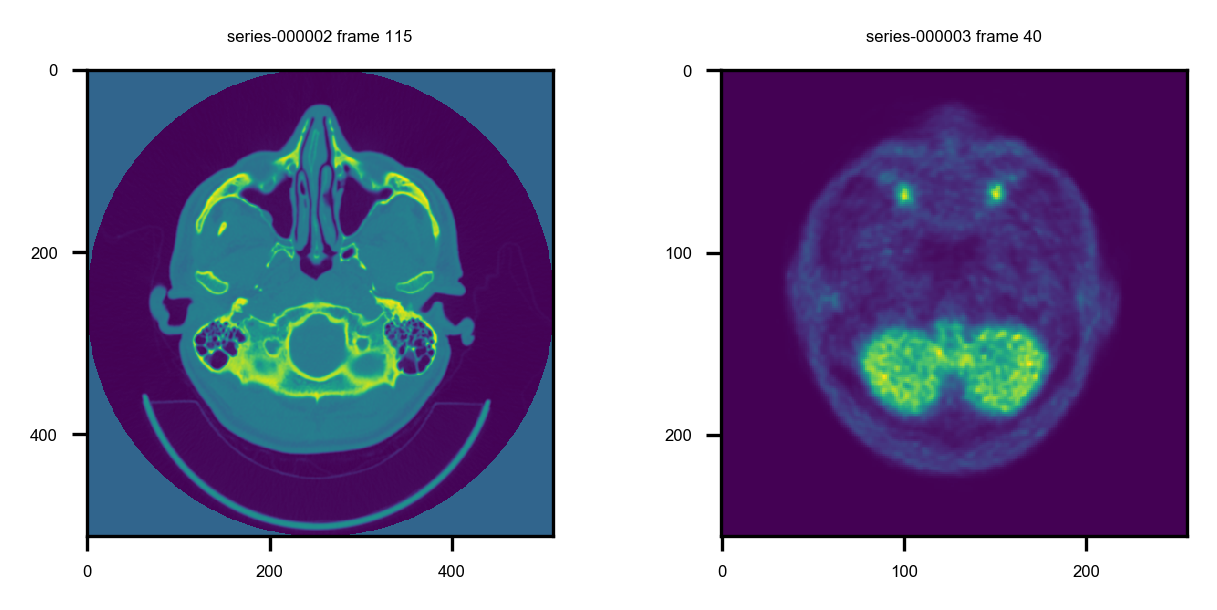

In [5]:
# Select which images to work with...

s1 = 2 # series (directory) number
f1 = 115 # frame no to plot
frame1 = dicomDict[dictKeys[s1]]['frames'][:,:,f1]

s2 = 3 # series (directory) number
f2 = 40 # frame no to plot
frame2 = dicomDict[dictKeys[s2]]['frames'][:,:,f2]

print('frame1.shape = ', frame1.shape)
print('frame1.dtype = ', frame1.dtype)
print('frame2.shape = ', frame2.shape)
print('frame2.dtype = ', frame2.dtype)

# Set the font dictionaries (for plot title and axis titles):
title_font = {'fontname':'Arial', 'size':'4', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'6'}

# Set the number of subplot rows and columns:
rows = 3
cols = 2

plt.figure(figsize=(5, 7), dpi=300);
i = 0             
# Row 1, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(frame1);
plt.title('{} frame {}'.format(dictKeys[s1], f1), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 1, Col 2:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(frame2);
plt.title('{} frame {}'.format(dictKeys[s2], f2), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    

# Try to perform image registration using ORB:

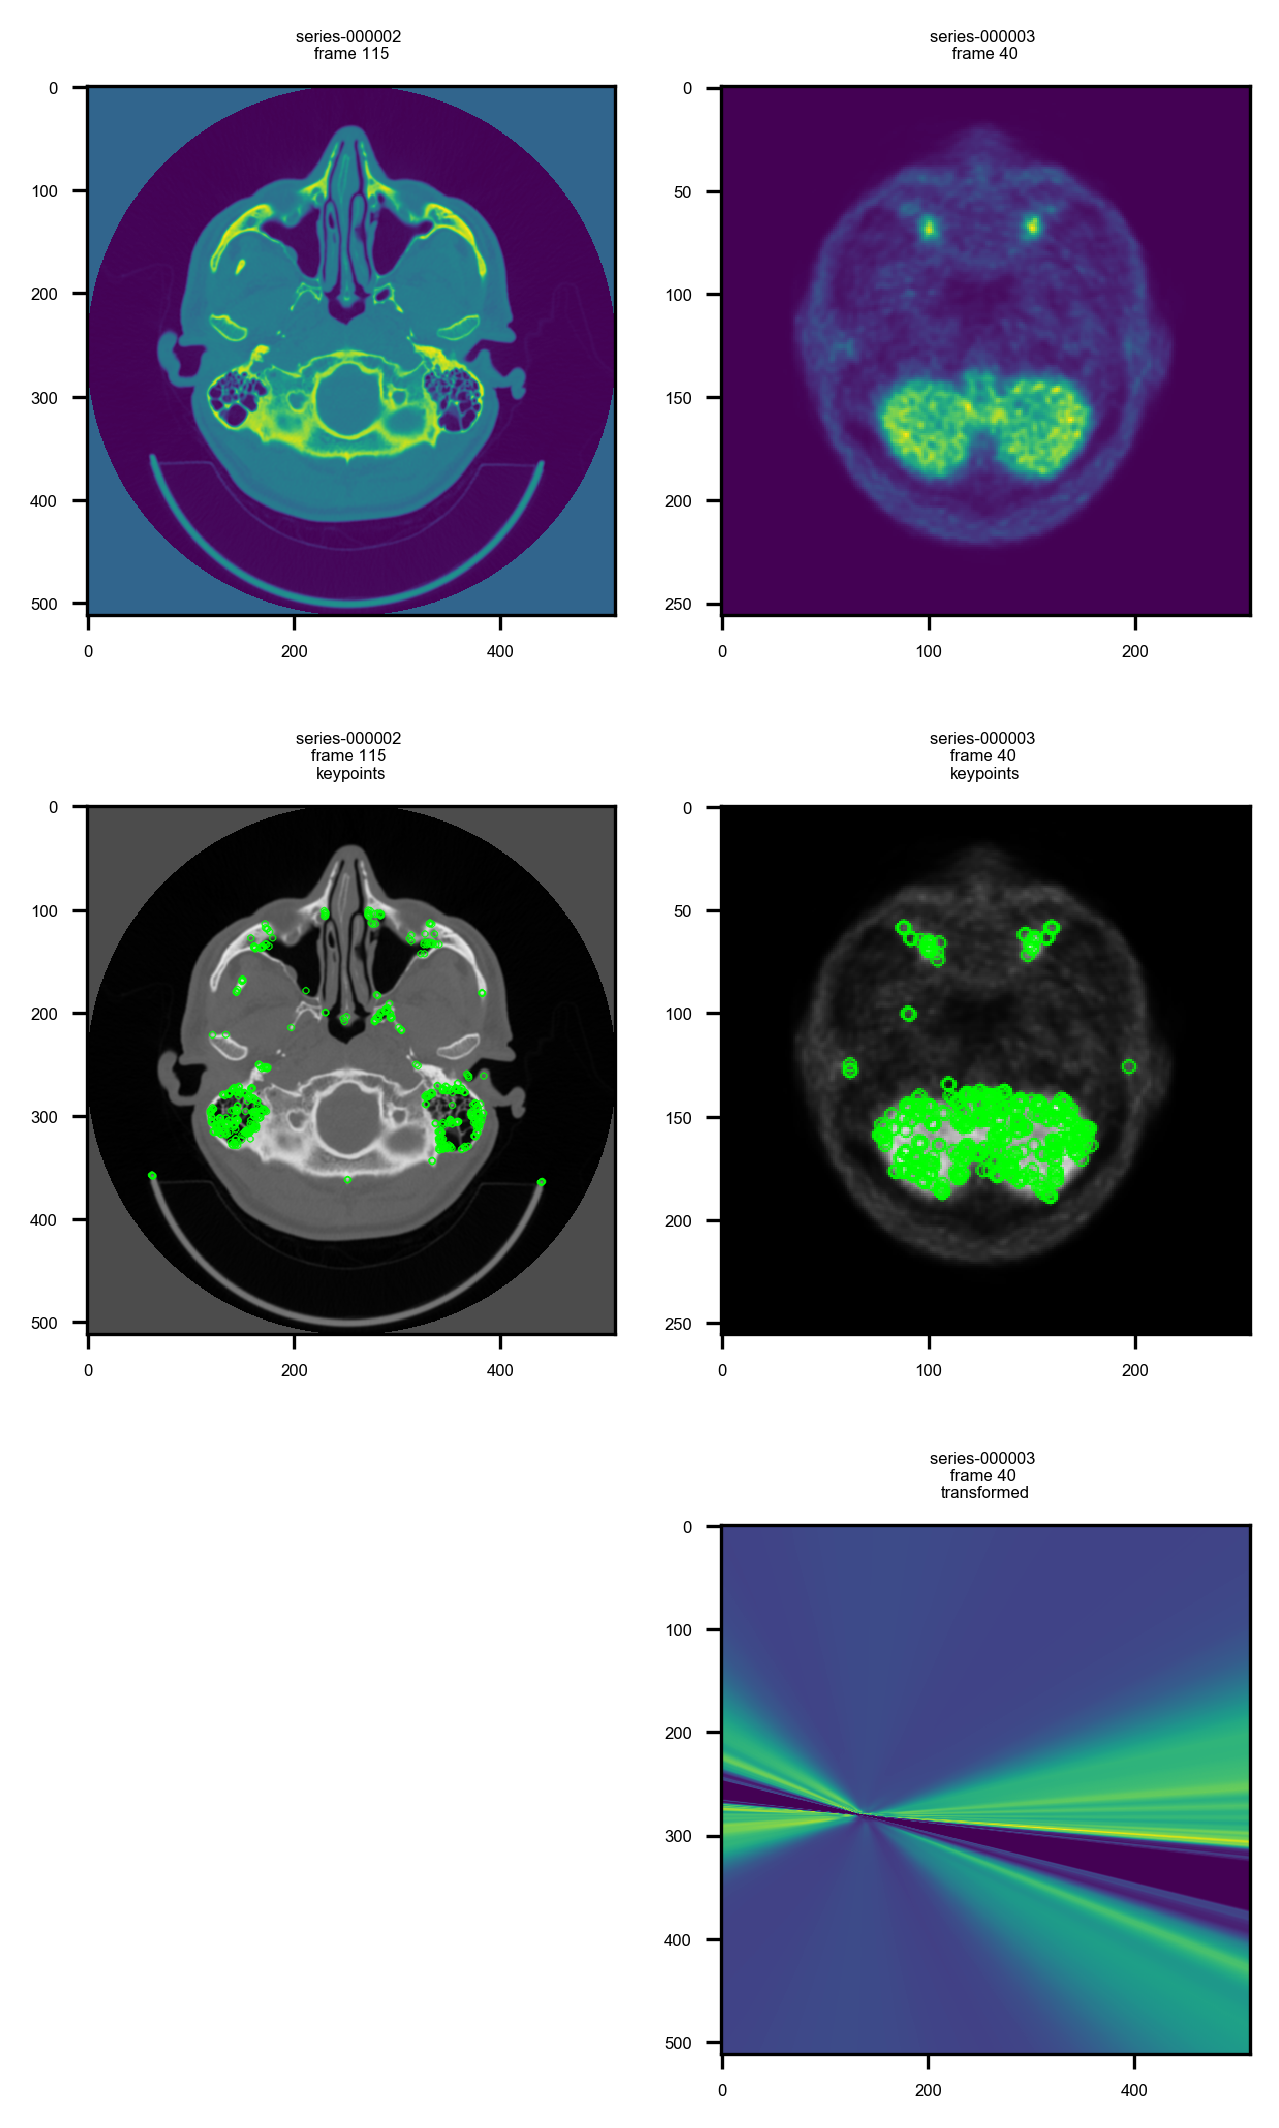

In [7]:
# The first image is the one to be aligned, the second is the reference image!

# Note frame1 is the CT scan, frame2 is the PET scan.

imRef = frame1.copy() # use CT scan as reference image
imAln = frame2.copy() # use PET scan as image to align 

# Copy series and frame numbers for plotting:
sRef = s1
fRef = f1
sAln = s2
fAln = f2

# Create ORB detector with 5000 features:
#orb_detector = cv2.ORB_create(5000) 
orb_detector = cv2.ORB_create() 
#orb_detector = cv2.ORB_create(10000) 
#orb_detector = cv2.ORB_create(50000) 
  
# Find keypoints and descriptors:
# (the first arg is the image, second arg is the mask, which is not 
# required in this case)
kpAln, dAln = orb_detector.detectAndCompute(imAln, None) 
kpRef, dRef = orb_detector.detectAndCompute(imRef, None) 

# Draw keypoints' locations (not size or orientation):
imAln_kpAln = cv2.drawKeypoints(imAln, kpAln, None, color=(0,255,0), flags=0)
imRef_kpRef = cv2.drawKeypoints(imRef, kpRef, None, color=(0,255,0), flags=0)
    
# Match features between the two images using a Brute Force matcher with  
# Hamming distance as measurement mode: 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
  
# Match the two sets of descriptors: 
matches = matcher.match(dAln, dRef) 
  
# Sort matches on the basis of their Hamming distance:
matches.sort(key = lambda x: x.distance) 
  
# Take the top 90 % matches forward:
matches = matches[:int(len(matches)*90)] 
no_of_matches = len(matches) 
  
# Define empty matrices of shape no_of_matches * 2: 
pAln = np.zeros((no_of_matches, 2)) 
pRef = np.zeros((no_of_matches, 2)) 
  
for i in range(len(matches)): 
    pAln[i, :] = kpAln[matches[i].queryIdx].pt 
    pRef[i, :] = kpRef[matches[i].trainIdx].pt 

# Find the homography matrix:
homography, mask = cv2.findHomography(pAln, pRef, cv2.RANSAC) 
  
# Use this matrix to transform the image to be aligned wrt the reference image:
imAln_transformed = cv2.warpPerspective(imAln, homography, imRef.shape)


# Set the number of subplot rows and columns:
rows = 3
cols = 2

plt.figure(figsize=(5, 9), dpi=300);
i = 0             
# Row 1, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imRef);
plt.title('{} \nframe {}'.format(dictKeys[sRef], fRef), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 1, Col 2:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imAln);
plt.title('{} \nframe {}'.format(dictKeys[sAln], fAln), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 2, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imRef_kpRef);
plt.title('{} \nframe {} \nkeypoints'.format(dictKeys[sRef], fRef), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 2, Col 2:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imAln_kpAln);
plt.title('{} \nframe {} \nkeypoints'.format(dictKeys[sAln], fAln), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 3, Col 2:  
i += 1
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imAln_transformed);
plt.title('{} \nframe {} \ntransformed'.format(dictKeys[sAln], fAln), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Export plot:
#plt.savefig('Im reg of CT frame {} in series {} with PET frame {} in series {}.jpg'\
#            .format(fRef, sRef, fAln, sAln), bbox_inches='tight')

# Weird.  There are probably lots of problems with what I've done and how I've done it.  But a simple thing to start with is creating a mask for the CT image to get rid of the circular frame and U-shaped feature

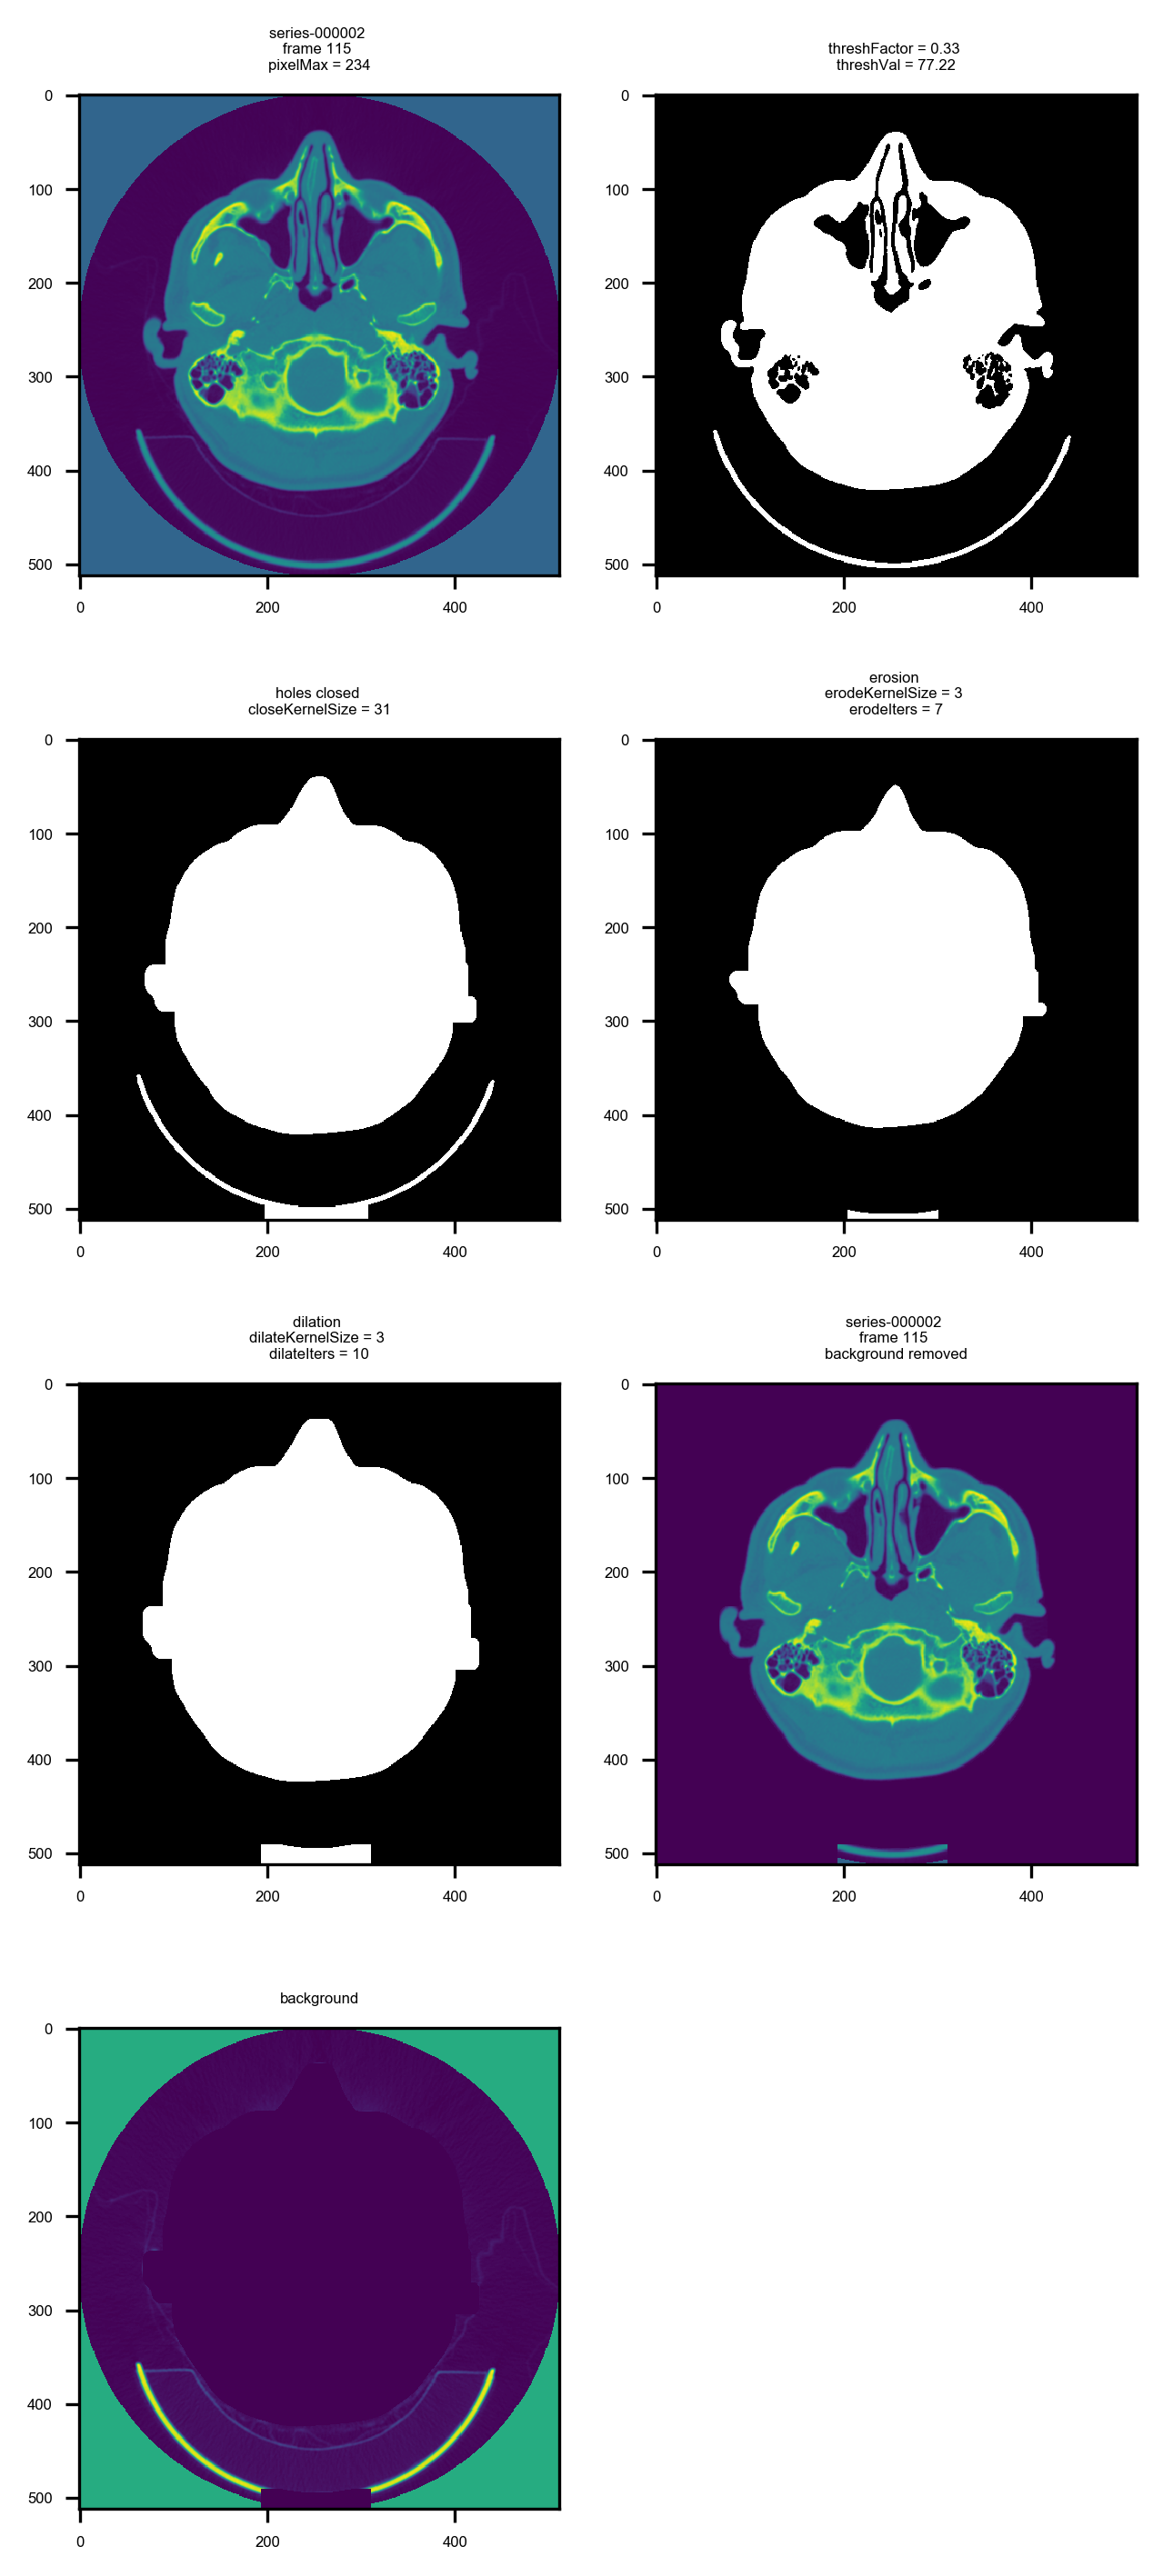

In [34]:
# Use thresholding, closing, eroding and dilation to clean up the image, 
# plotting the results along the way:

# The maximum pixel value:
pixelMax = np.max(imRef)
#print(pixelMax)

# Define parameters:
# For thresholding:
threshFactor = 0.33
threshVal = threshFactor*np.max(imRef)
# For closing:
closeKernelSize = 31
closeKernel = np.ones((closeKernelSize,closeKernelSize),np.uint8) # used for closing holes
# For eroding:
erodeKernelSize = 3 # 2
erodeIters = 7 # 14 # 7 # 20
erodeKernel = np.ones((erodeKernelSize,erodeKernelSize),np.uint8) # used for erosion
# For dilating:
dilateKernelSize = 3 # 3
dilateIters = 10 # 15 # 8 # 20
dilateKernel = np.ones((dilateKernelSize,dilateKernelSize),np.uint8) # used for dilation


# Set the number of subplot rows and columns:
rows = 4
cols = 2

plt.figure(figsize=(5, 12), dpi=300);
i = 0  

# Row 1, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imRef);
plt.title('{} \nframe {} \npixelMax = {}'.format(dictKeys[sRef], fRef, pixelMax), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Use cv2.threshold to binarise the ref image:
#mask = cv2.threshold(imRef, thresh, 255, cv2.THRESH_BINARY)[1]
mask = cv2.threshold(imRef, threshVal, np.max(imRef), cv2.THRESH_BINARY)[1]

# Row 1, Col 2:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(mask, cmap='gray');
plt.title('threshFactor = {} \nthreshVal = {}'.format(threshFactor, threshVal), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Close holes
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, closeKernel) 
    
# Row 2, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(mask, cmap='gray');
plt.title('holes closed \ncloseKernelSize = {}'.format(closeKernelSize), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Erode:
mask = cv2.erode(mask, erodeKernel, iterations = erodeIters)

# Row 2, Col 2:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(mask, cmap='gray');
plt.title('erosion \nerodeKernelSize = {} \nerodeIters = {}'.format(erodeKernelSize, erodeIters), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Dilate:
mask = cv2.dilate(mask, dilateKernel, iterations = dilateIters)

# Row 3, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(mask, cmap='gray');
plt.title('dilation \ndilateKernelSize = {} \ndilateIters = {}'.format(dilateKernelSize, dilateIters), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Convert mask to binary:
mask = cv2.threshold(mask, 255/2, 1, cv2.THRESH_BINARY)[1]

# Show result of background removal using mask:
imRefMasked = mask*imRef

# Row 3, Col 2:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imRefMasked);
plt.title('{} \nframe {} \nbackground removed'.format(dictKeys[sRef], fRef), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Show what the mask removed:
# Create the background mask:
backgroundMask = np.logical_not(mask)

# Backround result:
background = backgroundMask*imRef

# Row 4, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(background);
plt.title('background', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)

# Export plot:
#plt.savefig('Removing background from CT frame {} in series {}.jpg'.format(fRef, sRef), bbox_inches='tight')

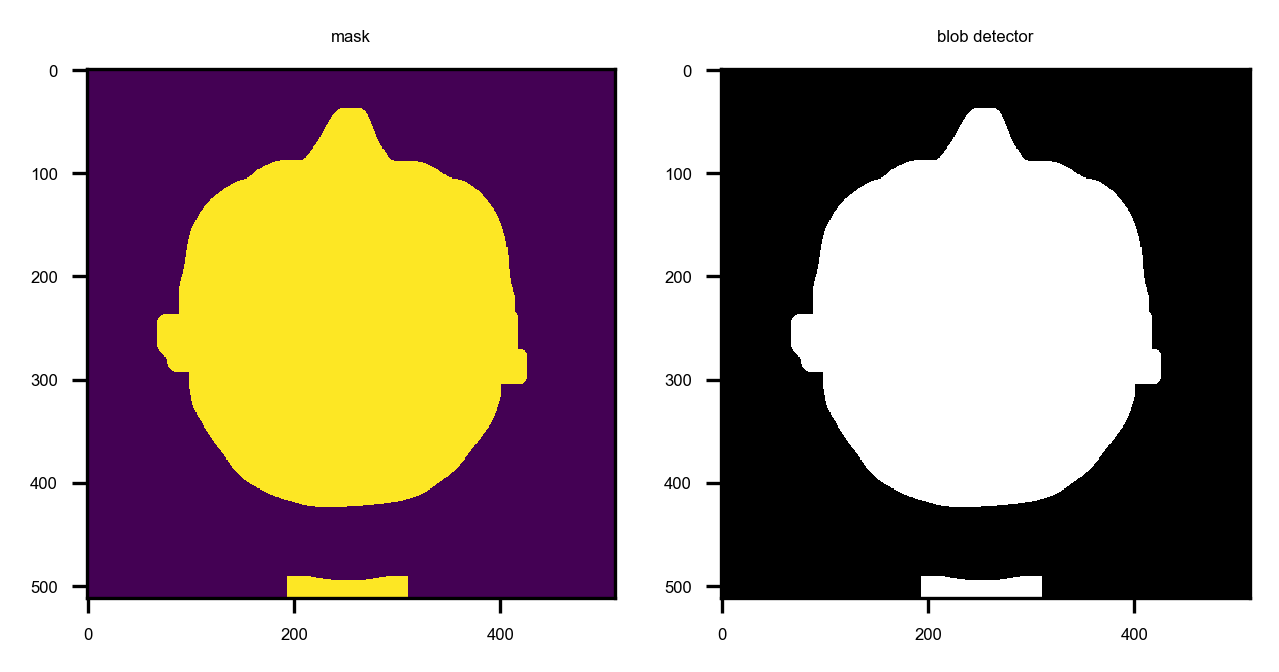

In [83]:
# Try using OpenCV's Blob Detector:

# Set up the detector with default parameters.
# Note: cv2.SimpleBlobDetector() kills the kernel when using OpenCV v4.1.2
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector()
else : 
    detector = cv2.SimpleBlobDetector_create()

# Detect blobs.
#keypoints = detector.detect(mask)
keypoints = detector.detect(mask*255)

    
for keypoint in keypoints:
    print('blob diameter = ', keypoint.size)
    print('blob area = ', pi*keypoint.size/2)
 
    
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
mask_with_keypoints = cv2.drawKeypoints(mask*255, keypoints, np.array([]), (0,0,255), \
                                               cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 

# Set the number of subplot rows and columns:
rows = 4
cols = 2

plt.figure(figsize=(5, 12), dpi=300);
i = 0  

# Row 1, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(mask*255);
plt.title('mask', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)

# Row 1, Col 2:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(mask_with_keypoints, cmap='gray');
plt.title('blob detector', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)

# OK now rather than using a default blob detector, define some parameters that will help isolate the skull

params.filterByColor       =  False
params.filterByArea        =  True (min = 1000.0)
params.filterByCircularity =  False
params.filterByInertia     =  False
params.filterByConvexity   =  False

blob diameter =  70.60791015625
blob area      =  110.91064591610157


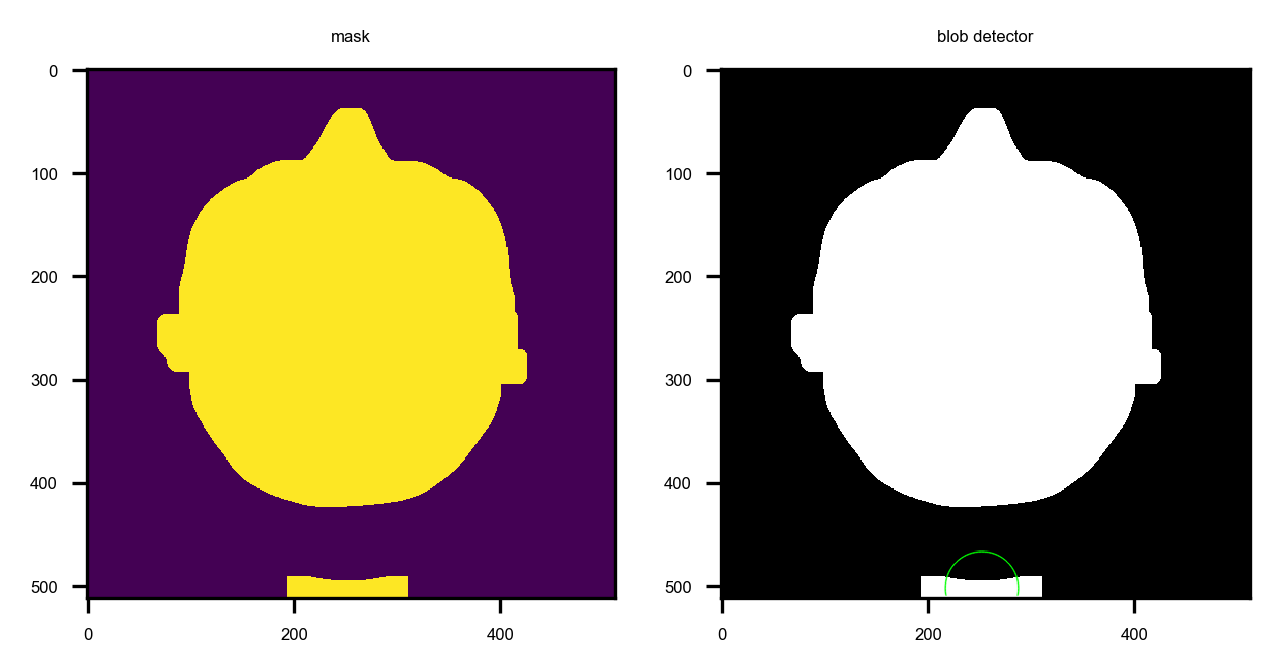

In [85]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;

# Filter by Colour:
params.filterByColor = False
params.blobColor = 255

# Filter by Area.
params.filterByArea = True
params.minArea = 1000
 
# Filter by Circularity:
# Note: Circularity = (4*Pi*Area)/(perimeter^2)
# The circularity of a square is 0.785
params.filterByCircularity = False # True
params.minCircularity = 0.01
 
# Filter by Convexity
params.filterByConvexity = False # True
params.minConvexity = 0.01 #0.87
 
# Filter by Inertia
params.filterByInertia = False # True
params.minInertiaRatio = 0.75

print('params.filterByColor       = ', params.filterByColor)
print('params.filterByArea        = ', params.filterByArea, '(min = {})'.format(params.minArea))
print('params.filterByCircularity = ', params.filterByCircularity)
print('params.filterByInertia     = ', params.filterByInertia)
print('params.filterByConvexity   = ', params.filterByConvexity)
 
# Create a detector with the parameters:
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
#keypoints = detector.detect(mask)
keypoints = detector.detect(mask*255)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
#mask_with_keypoints = cv2.drawKeypoints(mask, keypoints, np.array([]), (0,0,255), \
#                                               cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
mask_with_keypoints = cv2.drawKeypoints(mask*255, keypoints, np.array([]), (0,255,0), \
                                               cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
    
for keypoint in keypoints:
    print('\nblob diameter = ', keypoint.size)
    print('blob area      = ', math.pi*keypoint.size/2)
    
    
# Set the number of subplot rows and columns:
rows = 4
cols = 2

plt.figure(figsize=(5, 12), dpi=300);
i = 0  

# Row 1, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(mask*255);
plt.title('mask', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)

# Row 1, Col 2:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(mask_with_keypoints, cmap='gray');
plt.title('blob detector', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)

# For some reason it's ignoring completely the skull and picking up on the section of artefact at the bottom, even though its size is well below params.minArea!!

# Try using contours instead:

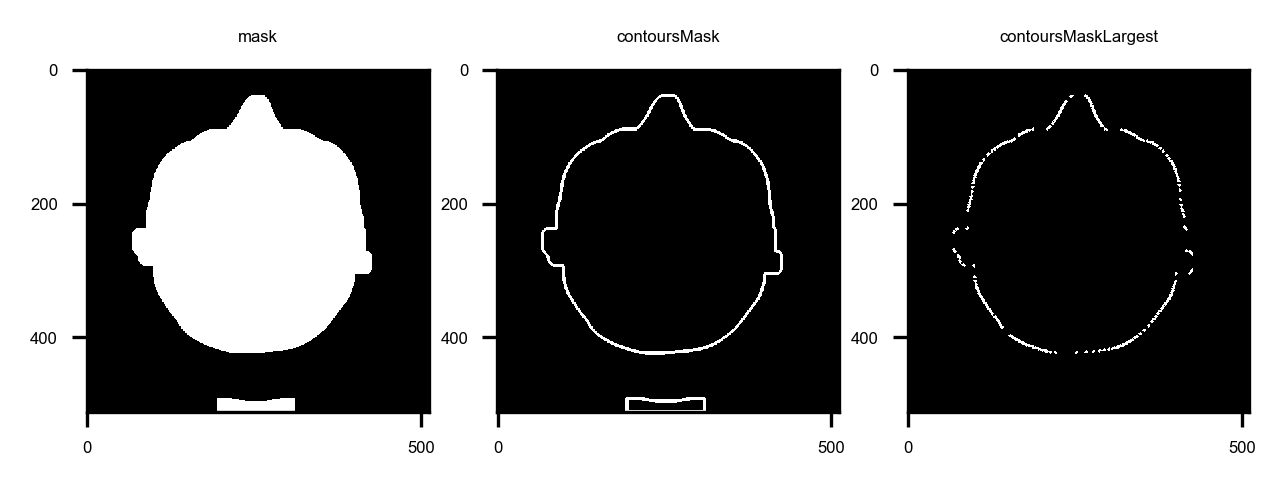

In [119]:

# Create empty array for masks that contour(s) will be added to:
emptyMask = np.zeros(mask.shape, dtype='uint8')

# Find contours in mask:
major = cv2.__version__.split('.')[0]
if major == '3':
    ret, contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
else:
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create mask of contours:
contoursMask = emptyMask.copy()
    
if len(contours) != 0:
    # the contours are drawn here
    cv2.drawContours(contoursMask, contours, -1, 255, 3)

    #find the biggest area of the contour
    largestContour = max(contours, key = cv2.contourArea)

    # Create mask of largest contour only:
    contoursMaskLargest = emptyMask.copy()
    
    #x,y,w,h = cv2.boundingRect(c)
    # draw the 'human' contour (in green)
    ##cv2.rectangle(mask_with_largest_contour, (x,y), (x+w,y+h), (0,255,0), 2)
    #cv2.rectangle(mask_with_largest_contour, (x,y), (x+w,y+h), 255, 2)
    
    # Draw the largest contour only:
    lineThickness = 3 #35
    cv2.drawContours(contoursMaskLargest, largestContour, -1, 255, lineThickness)
    #cv2.drawContours(contoursMaskLargest, largestContour, -1, 255, lineThickness, cv2.FILLED)
    #cv2.drawContours(contoursMaskLargest, largestContour, -1, 255, lineThickness, cv2.LINE_4)
    #cv2.drawContours(contoursMaskLargest, largestContour, -1, 255, lineThickness, cv2.LINE_8)
    #cv2.drawContours(contoursMaskLargest, largestContour, -1, 255, lineThickness, cv2.LINE_AA)



# Set the number of subplot rows and columns:
rows = 4
cols = 3

plt.figure(figsize=(5, 12), dpi=300);
i = 0  

# Row 1, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(mask*255, cmap='gray');
plt.title('mask', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)

# Row 1, Col 2:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(contoursMask, cmap='gray');
plt.title('contoursMask', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 1, Col 3:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(contoursMaskLargest, cmap='gray');
plt.title('contoursMaskLargest', **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)

In [106]:
len(contours[1])

475

In [103]:
len(largestContour)

475

In [107]:
contours[1]

array([[[245,  38]],

       [[244,  39]],

       [[243,  39]],

       [[236,  46]],

       [[236,  47]],

       [[234,  49]],

       [[234,  50]],

       [[233,  51]],

       [[233,  52]],

       [[231,  54]],

       [[231,  55]],

       [[230,  56]],

       [[230,  57]],

       [[229,  58]],

       [[229,  59]],

       [[228,  60]],

       [[228,  61]],

       [[227,  62]],

       [[227,  63]],

       [[226,  64]],

       [[226,  65]],

       [[225,  66]],

       [[225,  67]],

       [[224,  68]],

       [[224,  69]],

       [[222,  71]],

       [[222,  72]],

       [[219,  75]],

       [[219,  76]],

       [[216,  79]],

       [[216,  80]],

       [[212,  84]],

       [[212,  85]],

       [[211,  86]],

       [[210,  86]],

       [[208,  88]],

       [[187,  88]],

       [[186,  89]],

       [[182,  89]],

       [[181,  90]],

       [[179,  90]],

       [[178,  91]],

       [[177,  91]],

       [[176,  92]],

       [[175,  92]],

       [[1

In [102]:
largestContour

array([[[245,  38]],

       [[244,  39]],

       [[243,  39]],

       [[236,  46]],

       [[236,  47]],

       [[234,  49]],

       [[234,  50]],

       [[233,  51]],

       [[233,  52]],

       [[231,  54]],

       [[231,  55]],

       [[230,  56]],

       [[230,  57]],

       [[229,  58]],

       [[229,  59]],

       [[228,  60]],

       [[228,  61]],

       [[227,  62]],

       [[227,  63]],

       [[226,  64]],

       [[226,  65]],

       [[225,  66]],

       [[225,  67]],

       [[224,  68]],

       [[224,  69]],

       [[222,  71]],

       [[222,  72]],

       [[219,  75]],

       [[219,  76]],

       [[216,  79]],

       [[216,  80]],

       [[212,  84]],

       [[212,  85]],

       [[211,  86]],

       [[210,  86]],

       [[208,  88]],

       [[187,  88]],

       [[186,  89]],

       [[182,  89]],

       [[181,  90]],

       [[179,  90]],

       [[178,  91]],

       [[177,  91]],

       [[176,  92]],

       [[175,  92]],

       [[1

# Repeat image registration but using CT scan with background removed

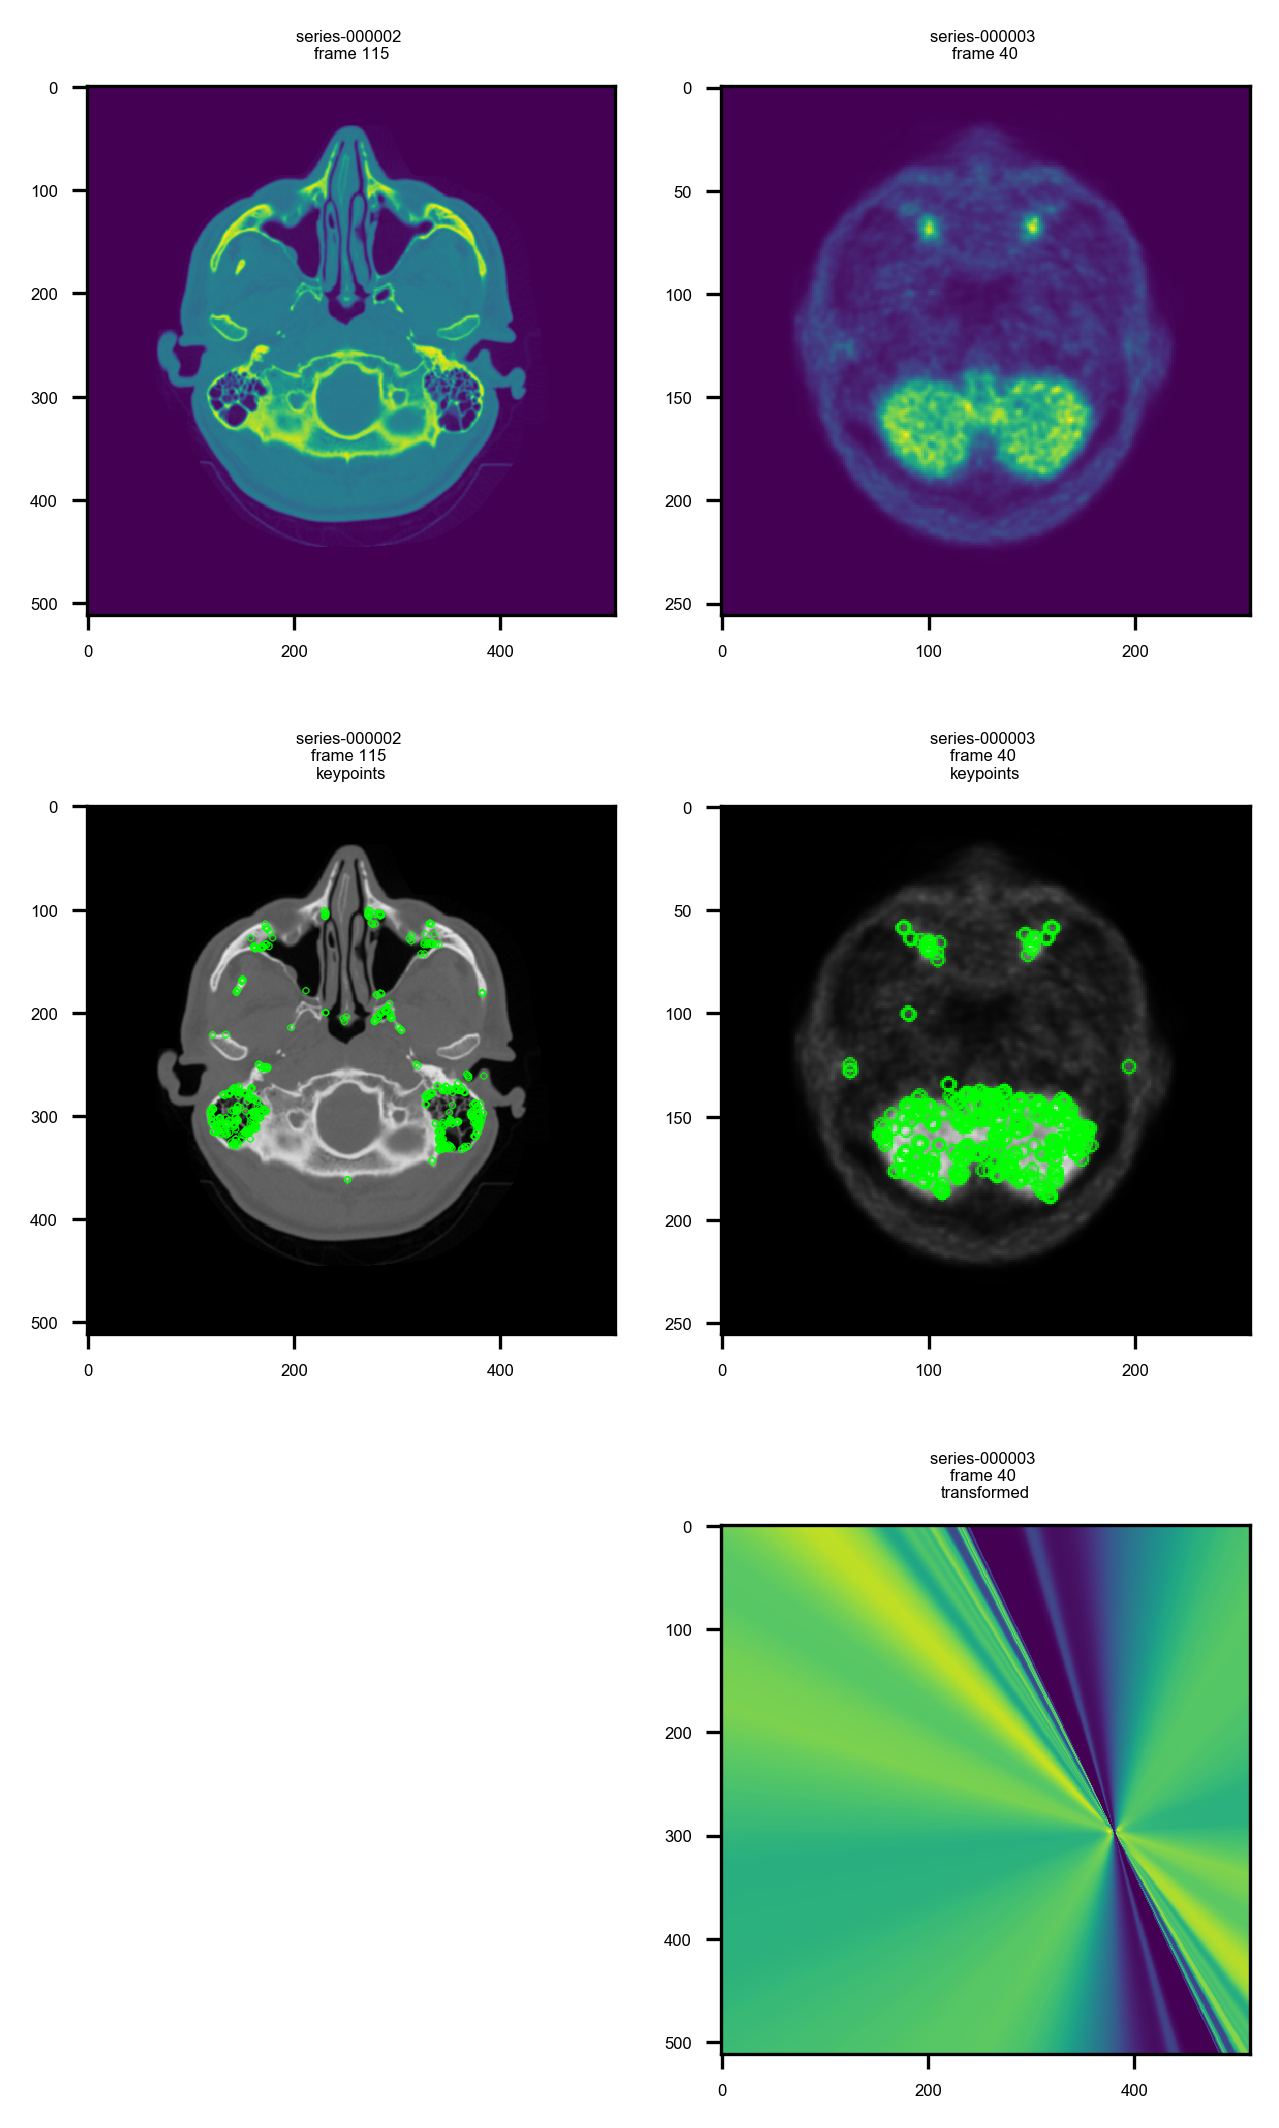

In [183]:
# Find keypoints and descriptors:
# (the first arg is the image, second arg is the mask, which is not 
# required in this case)
kpAln, dAln = orb_detector.detectAndCompute(imAln, None) 
kpRef, dRef = orb_detector.detectAndCompute(imRefMasked, None) 

# Draw keypoints' locations (not size or orientation):
imAln_kpAln = cv2.drawKeypoints(imAln, kpAln, None, color=(0,255,0), flags=0)
imRef_kpRef = cv2.drawKeypoints(imRefMasked, kpRef, None, color=(0,255,0), flags=0)
    
# Match features between the two images using a Brute Force matcher with  
# Hamming distance as measurement mode: 
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 
  
# Match the two sets of descriptors: 
matches = matcher.match(dAln, dRef) 
  
# Sort matches on the basis of their Hamming distance:
matches.sort(key = lambda x: x.distance) 
  
# Take the top 90 % matches forward:
matches = matches[:int(len(matches)*90)] 
no_of_matches = len(matches) 
  
# Define empty matrices of shape no_of_matches * 2: 
pAln = np.zeros((no_of_matches, 2)) 
pRef = np.zeros((no_of_matches, 2)) 
  
for i in range(len(matches)): 
    pAln[i, :] = kpAln[matches[i].queryIdx].pt 
    pRef[i, :] = kpRef[matches[i].trainIdx].pt 

# Find the homography matrix:
homography, mask = cv2.findHomography(pAln, pRef, cv2.RANSAC) 
  
# Use this matrix to transform the image to be aligned wrt the reference image:
imAln_transformed = cv2.warpPerspective(imAln, homography, imRef.shape)


# Set the number of subplot rows and columns:
rows = 3
cols = 2

plt.figure(figsize=(5, 9), dpi=300);
i = 0             
# Row 1, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imRefMasked);
plt.title('{} \nframe {}'.format(dictKeys[sRef], fRef), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 1, Col 2:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imAln);
plt.title('{} \nframe {}'.format(dictKeys[sAln], fAln), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 2, Col 1:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imRef_kpRef);
plt.title('{} \nframe {} \nkeypoints'.format(dictKeys[sRef], fRef), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 2, Col 2:  
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imAln_kpAln);
plt.title('{} \nframe {} \nkeypoints'.format(dictKeys[sAln], fAln), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Row 3, Col 2:  
i += 1
i += 1
ax = plt.subplot(rows,cols,i, aspect='equal');
plt.imshow(imAln_transformed);
plt.title('{} \nframe {} \ntransformed'.format(dictKeys[sAln], fAln), **title_font);

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(4)
    
# Export plot:
plt.savefig('Im reg of CT frame {} (background removed) in series {} with PET frame {} in series {}.jpg'.format(fRef, sRef, fAln, sAln), bbox_inches='tight')

In [120]:
import SimpleITK

ModuleNotFoundError: No module named 'SimpleITK'